<a href="https://colab.research.google.com/github/ruany-doehnert/Deforestation_Amazon/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# conect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Load your trained model and previous results
clf = joblib.load('/content/drive/MyDrive/forest_rf_model.joblib')
results = pd.read_csv('/content/drive/MyDrive/forest_predictions.csv')

In [15]:
# Historical years and feature averages (replace with your real data)
years = np.arange(2022, 2029)
future_data = []
for year in years:
    # Simulate 100 samples per year (replace with real data)
    np.random.seed(year)
    df_year = pd.DataFrame({
        'treecover': np.random.uniform(0, 100, 100),
        'NDVI': np.random.uniform(0, 1, 100),
        'NBR': np.random.uniform(-1, 1, 100),
        'elevation': np.random.uniform(0, 500, 100),
        'year': year
    })
    future_data.append(df_year)
future_df = pd.concat(future_data, ignore_index=True)


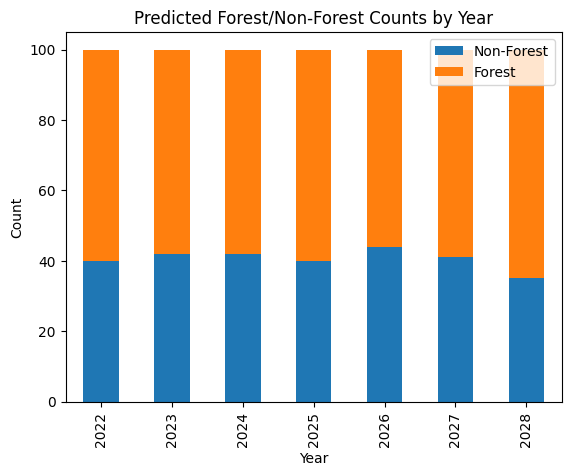

✅ Future predictions saved to Google Drive.


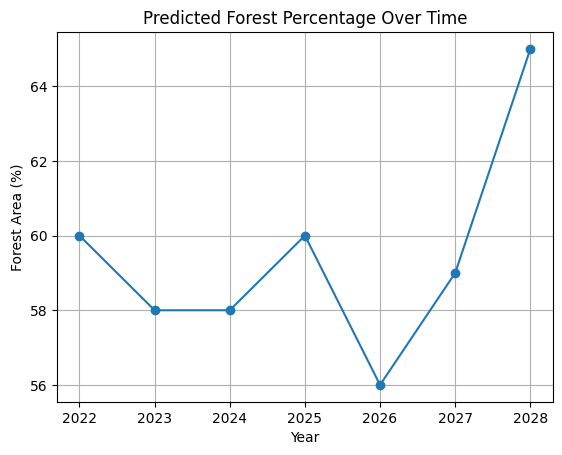

In [16]:
# 3. Predict using your model
X_future = future_df[['treecover', 'NDVI', 'NBR', 'elevation']]
future_df['predicted_label'] = clf.predict(X_future)

# 4. Analyze and visualize predictions over time
summary = future_df.groupby('year')['predicted_label'].value_counts().unstack().fillna(0)
summary.plot(kind='bar', stacked=True)
plt.title('Predicted Forest/Non-Forest Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Non-Forest', 'Forest'])
plt.show()

# 5. (Optional) Save future predictions
future_df.to_csv('/content/drive/MyDrive/forest_future_predictions.csv', index=False)
print("✅ Future predictions saved to Google Drive.")

# 6. (Optional) Time-series trend analysis
forest_percent = summary[1] / (summary[0] + summary[1]) * 100
plt.plot(forest_percent.index, forest_percent.values, marker='o')
plt.title('Predicted Forest Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Forest Area (%)')
plt.grid(True)
plt.show()